Datathon

Background

dataset obtained from this paper:
    https://pubs.rsc.org/en/content/articlelanding/2017/TA/C7TA01812F

Descriptors:
    
    atomic number (AN)
    period (P)
    group (G)
    Pauling electronegativity (EN)
    covalent radii (Rcov) in Å
    d-band center (εd) in eV



    ΔE*CO : Binding energy of adsorbed CO on a metal surface
    f : Filling of a d-band
    !!εd : Center of a d-band
    Wd : Width of a d-band
    γ1 : Skewness of a d-band
    γ2 : Kurtosis of a d-band
    W : Work function
    !!r0 : Atomic radius
    rd : Spatial extent of d-orbitals
    IE : Ionization potential
    EA : Electron affinity
    !!χ0 : Pauling electronegativity
    χ : Local Pauling electronegativity
    !!"
    ! : Adsorbate-metal interatomic d coupling matrix element squared15


Case:
Could change Number of descriptors

Accuracy:
mean squared error (MSE)
goodness of fit (R2) 


In [10]:
# Build a new Anaconda environment with Python 3ß
# Install libraries needed
!pip install tqdm
!pip install missingno
!pip install pandas_profiling
!pip install folium
!pip install pivottablejs
!pip install -U scikit-learn

  Using cached scikit_learn-1.0.2-cp38-cp38-macosx_10_13_x86_64.whl (7.9 MB)


In [32]:
# To output plotting commands display inline within frontends
%matplotlib inline
#To obtain retina-display quality for figures into code
%config InlineBackend.figure_format='retina'

# To use features which will appear in newer versions while having an older release of Python
from __future__ import absolute_import, division, print_function

# Plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
sns.set_context("poster", font_scale=0.5)
import folium

# Basic Wrangling 
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

# System Packages 
import os, sys
import warnings
warnings.filterwarnings('ignore')

# EDA Tools 
import missingno as msno
import pandas_profiling
import pivottablejs

#from tqdm import tqdm
from sklearn.datasets import make_blobs
import time

# More Technical EDA
import sklearn
import scipy

# Update matplotlib defaults to something nicer 
#mpl_update = {'font.size':16,
#              'xtick.labelsize':14,
#              'ytick.labelsize':14,
#              'figure.figsize':[12.0,8.0],
#              'axes.color_cycle':['#0055A7', '#2C3E4F', '#26C5ED', '#00cc66', '#D34100', '#FF9700','#091D32'], 
#              'axes.labelsize':20,
#              'axes.labelcolor':'#677385',
#              'axes.titlesize':20,
#              'lines.color':'#0055A7',
#              'lines.linewidth':3,
#              'text.color':'#677385'}
#mpl.rcParams.update(mpl_update)

### Description of the Data Columns (Units)
> Where indicated, data from the nearest airport weather station (Chièvres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the **4 months of data**.
<table>
    <thead class="valign-top">
        <tr>
            <th scope="col" class="rowsep-1 align-left">Variables, Description</th>
            <th scope="col" class="rowsep-1 align-left">Units</th>
            <th scope="col" class="rowsep-1 align-left">Number of Features</th>
        </tr>
    </thead>
    <tbody>
        <tr>
        <th class="align-left" scope="row">name</th>
            <td class="align-left">N/A</td>
            <td class="align-char">–</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">CO/OH</th>
            <td class="align-left">N/A</td>
            <td class="align-char">1</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">filling</th>
            <td class="align-left">N/A</td>
            <td class="align-char">2</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">center</th>
            <td class="align-left">N/A</td>
            <td class="align-char">3</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">sigma_c</th>
            <td class="align-left">na</td>
            <td class="align-char">4</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">skewness</th>
            <td class="align-left">na</td>
            <td class="align-char">5</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">kurtosis</th>
            <td class="align-left">na</td>
            <td class="align-char">6</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">local_Pauling</th>
            <td class="align-left">na</td>
            <td class="align-char">7</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">IonizationPotential</th>
            <td class="align-left">na</td>
            <td class="align-char">8</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">ElectronAffinity</th>
            <td class="align-left">na</td>
            <td class="align-char">9</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Pauling</th>
            <td class="align-left">na</td>
            <td class="align-char">10</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">WorkFunction</th>
            <td class="align-left">na</td>
            <td class="align-char">11</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">dBandCenter</th>
            <td class="align-left">na</td>
            <td class="align-char">12</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">AtomicRadius</th>
            <td class="align-left">A</td>
            <td class="align-char">13</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">OrbitalRadius</th>
            <td class="align-left">A</td>
            <td class="align-char">14</td>
        </tr>
    </tbody>
</table>

### Visulizing data

In [13]:
# Loading the data
# df = pd.read_csv("./data/co.csv")
df_loaded = pd.read_csv("./data/co.csv")
# there are 4 csv file in the data folder
df = df_loaded

In [14]:
#(rows,columns)
df.shape

(971, 15)

In [16]:
#see the heading and first 5 rows
df.head()

,name,CO,filling,center,sigma_c,skewness,kurtosis,local_Pauling,IonizationPotential,ElectronAffinity,Pauling,WorkFunction,dBandCenter,AtomicRadius,OrbitalRadius
0,M-Ni-Cu,-1.438149,0.866845,-1.058236,1.225608,0.370870,5.860201,1.906994,7.64,1.16,1.91,5.77,-1.29,1.38,0.71
1,M-Ni-Ru,-1.666744,0.870556,-1.180083,1.210548,0.343019,5.964618,1.992738,7.64,1.16,1.91,5.77,-1.29,1.38,0.71
2,M-Ni-Rh,-1.618728,0.862962,-1.196840,1.219834,0.279196,6.020930,2.014206,7.64,1.16,1.91,5.77,-1.29,1.38,0.71
3,M-Ni-Pd,-1.695970,0.866355,-1.127358,1.156320,0.284750,6.080364,1.992738,7.64,1.16,1.91,5.77,-1.29,1.38,0.71
4,M-Ni-Ag,-1.856567,0.882387,-0.806609,1.012896,0.197427,10.777396,1.915978,7.64,1.16,1.91,5.77,-1.29,1.38,0.71


In [30]:
all_columns = df.columns.tolist()
all_columns


['name',
 'CO',
 'filling',
 'center',
 'sigma_c',
 'skewness',
 'kurtosis',
 'local_Pauling',
 'IonizationPotential',
 'ElectronAffinity',
 'Pauling',
 'WorkFunction',
 'dBandCenter',
 'AtomicRadius',
 'OrbitalRadius']

In [21]:
df[['CO','filling', 'center', 'sigma_c', 'skewness', 'kurtosis', 'local_Pauling', 'IonizationPotential', 'ElectronAffinity', 'Pauling', 'WorkFunction', 'dBandCenter', 'AtomicRadius', 'OrbitalRadius']].describe().astype(int)

,CO,filling,center,sigma_c,skewness,kurtosis,local_Pauling,IonizationPotential,ElectronAffinity,Pauling,WorkFunction,dBandCenter,AtomicRadius,OrbitalRadius
count,971,971,971,971,971,971,971,971,971,971,971,971,971,971
mean,-1,0,-1,1,0,5,2,7,1,2,5,-1,1,0
std,0,0,1,0,0,3,0,0,0,0,0,1,0,0
min,-3,0,-4,0,-1,1,1,6,0,1,4,-4,1,0
25%,-1,0,-2,1,0,2,1,7,0,1,5,-2,1,0
50%,-1,0,-1,1,0,3,2,7,1,2,5,-1,1,0
75%,0,0,-1,2,0,5,2,8,1,2,5,-1,1,1
max,0,0,1,3,2,18,2,9,2,2,6,2,1,1


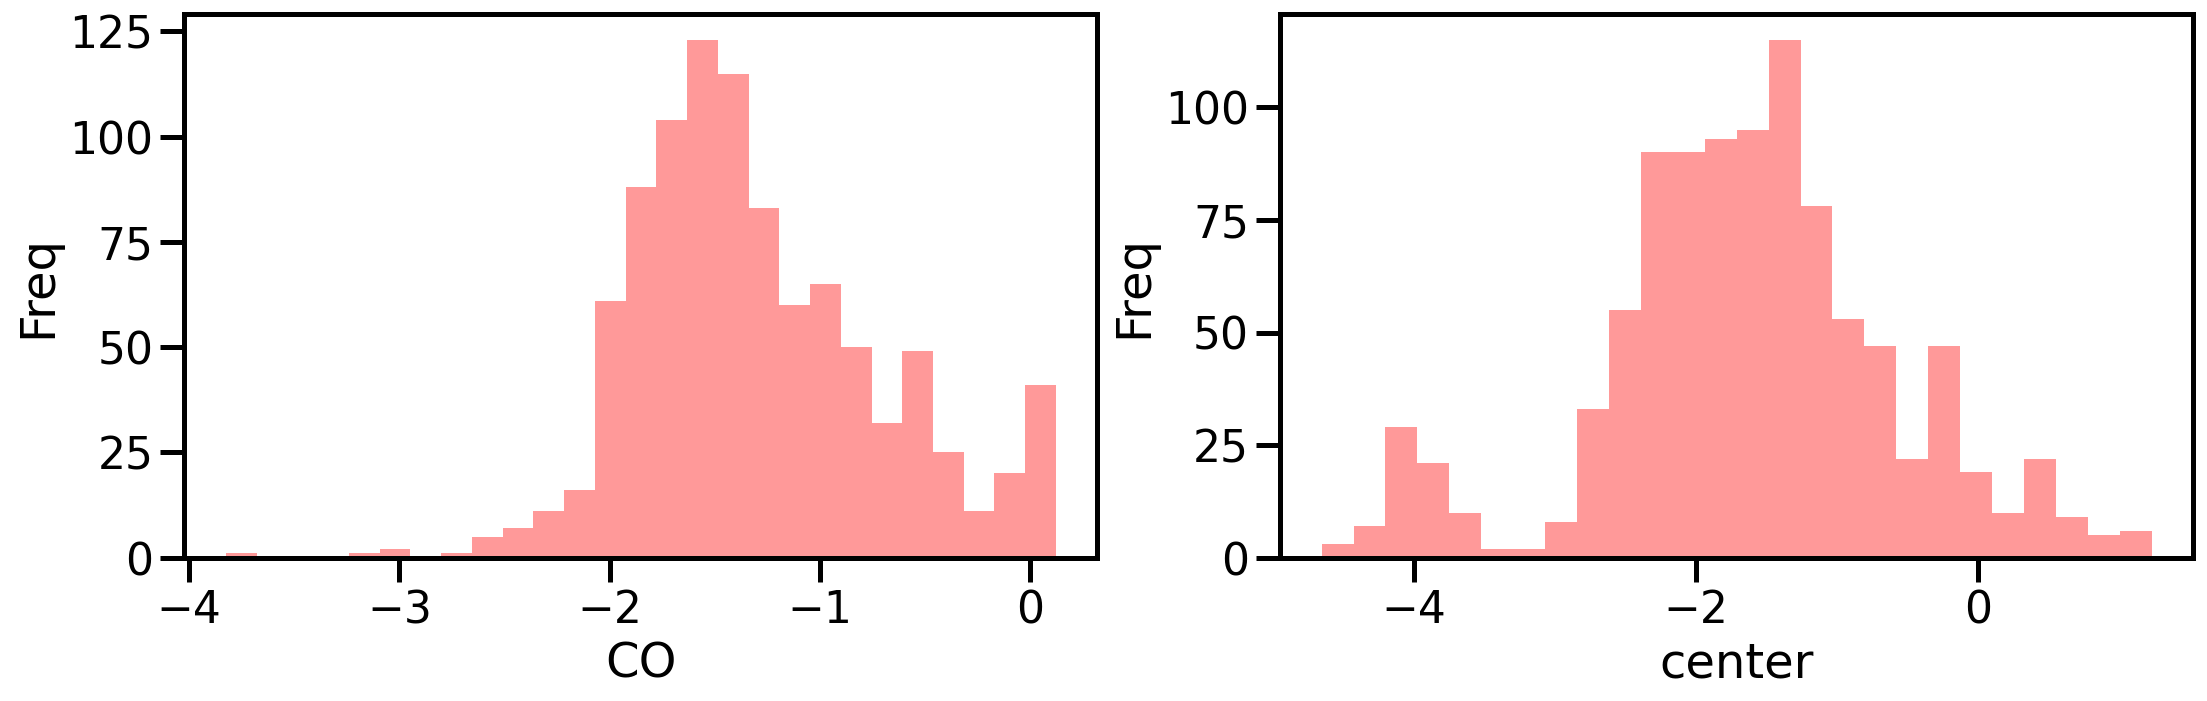

In [28]:
fig, (ax1, ax2) = plt.subplots(figsize=(18,5), ncols=2)
sns.distplot(df.CO, kde=False, color="red", ax=ax1)
sns.distplot(df.center, kde=False, color="red", ax=ax2)
ax1.set_ylabel("Freq")
ax2.set_ylabel("Freq");

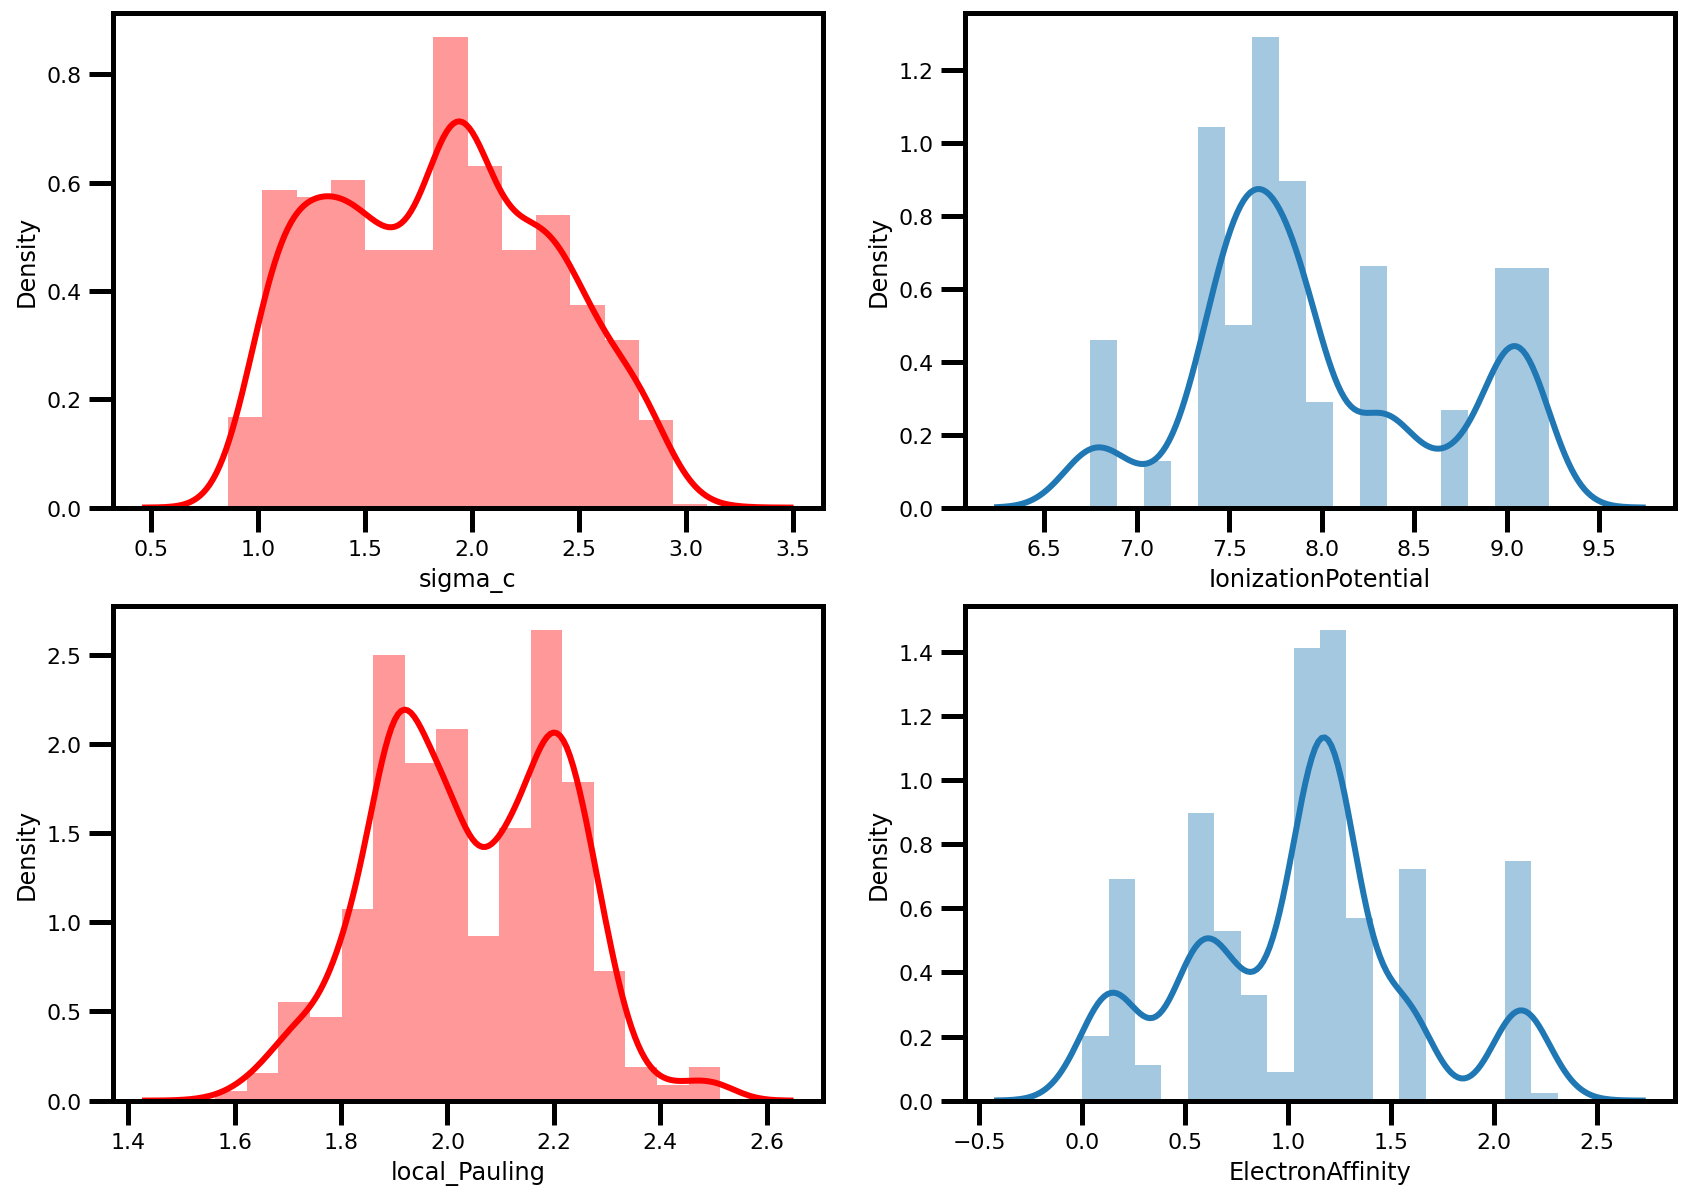

In [33]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(figsize=(14,10), nrows=2, ncols=2)
sns.distplot(df.sigma_c, color="red", ax=ax1, axlabel="sigma_c")
sns.distplot(df.local_Pauling, color="red", ax=ax2, axlabel="local_Pauling")
sns.distplot(df.IonizationPotential, ax=ax3, axlabel="IonizationPotential")
sns.distplot(df.ElectronAffinity, ax=ax4, axlabel="ElectronAffinity");

### Examining pair-wise relationship

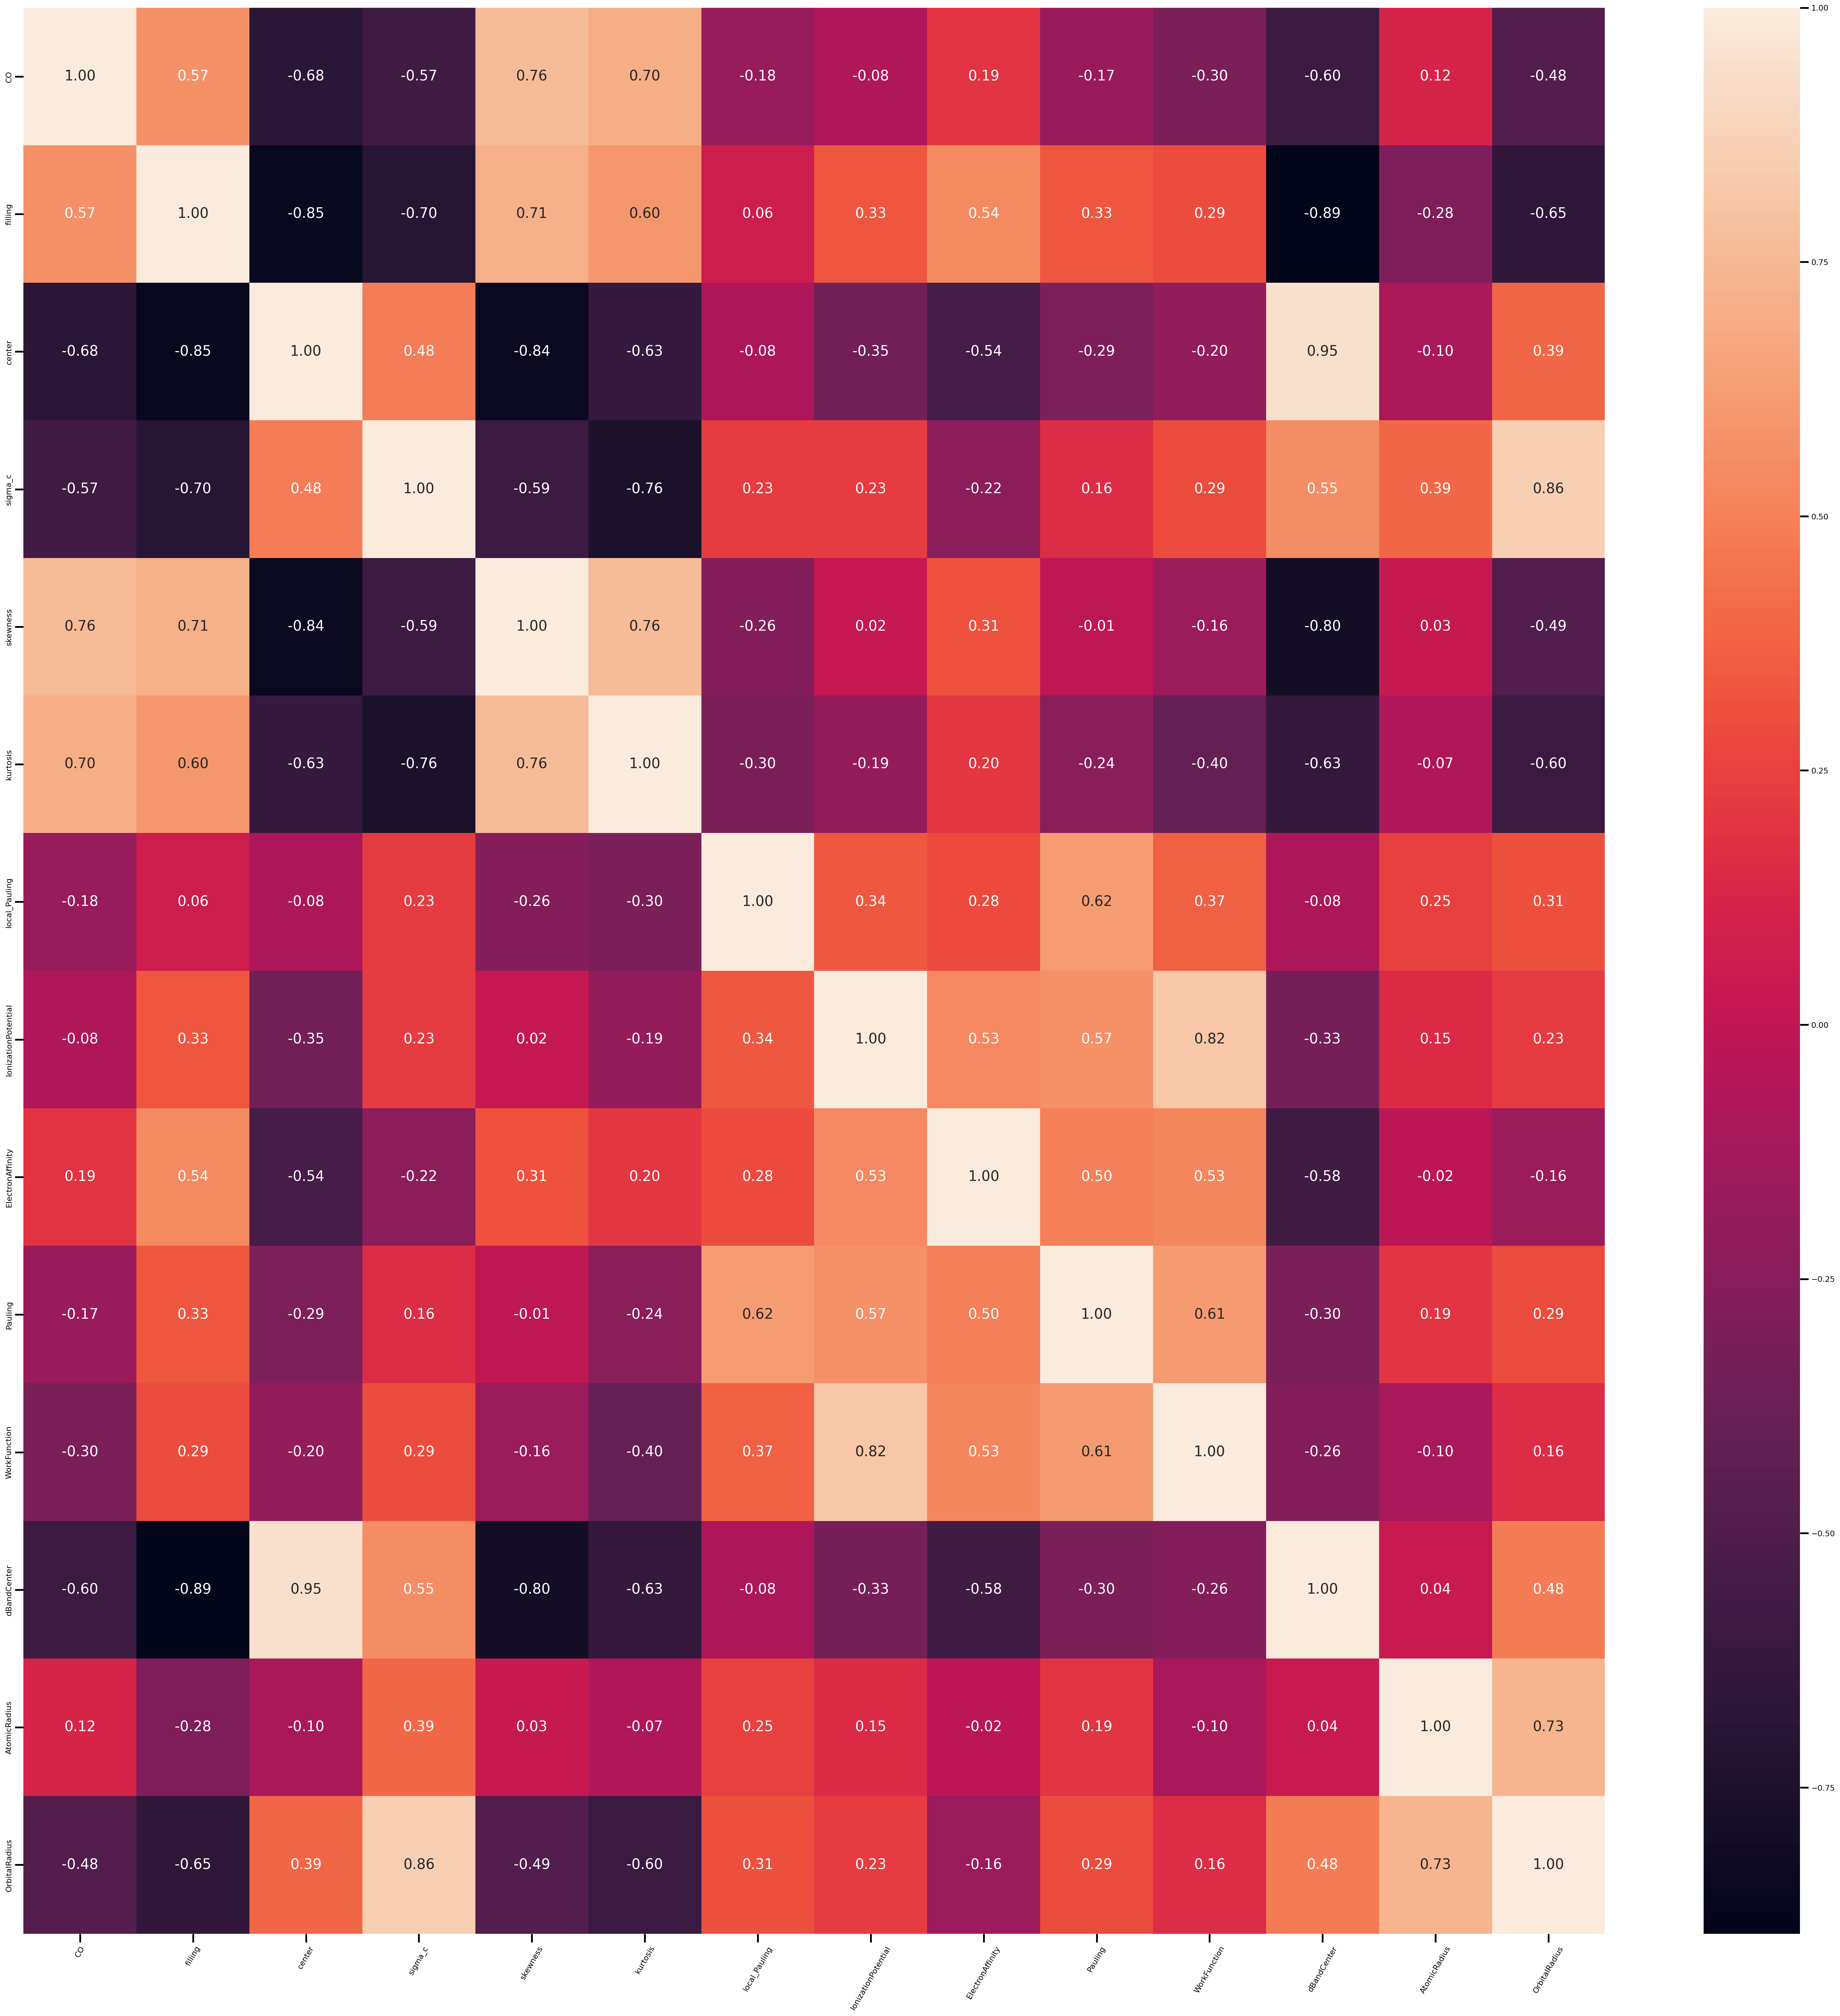

In [34]:
#Correlation Heat Map
plt.figure(figsize=(50,50));
a = sns.heatmap(df.corr(), annot=True, fmt=".2f", annot_kws={"size": 20});
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show();

Text(0.5, 1.0, 'Correlations between CO and variables')

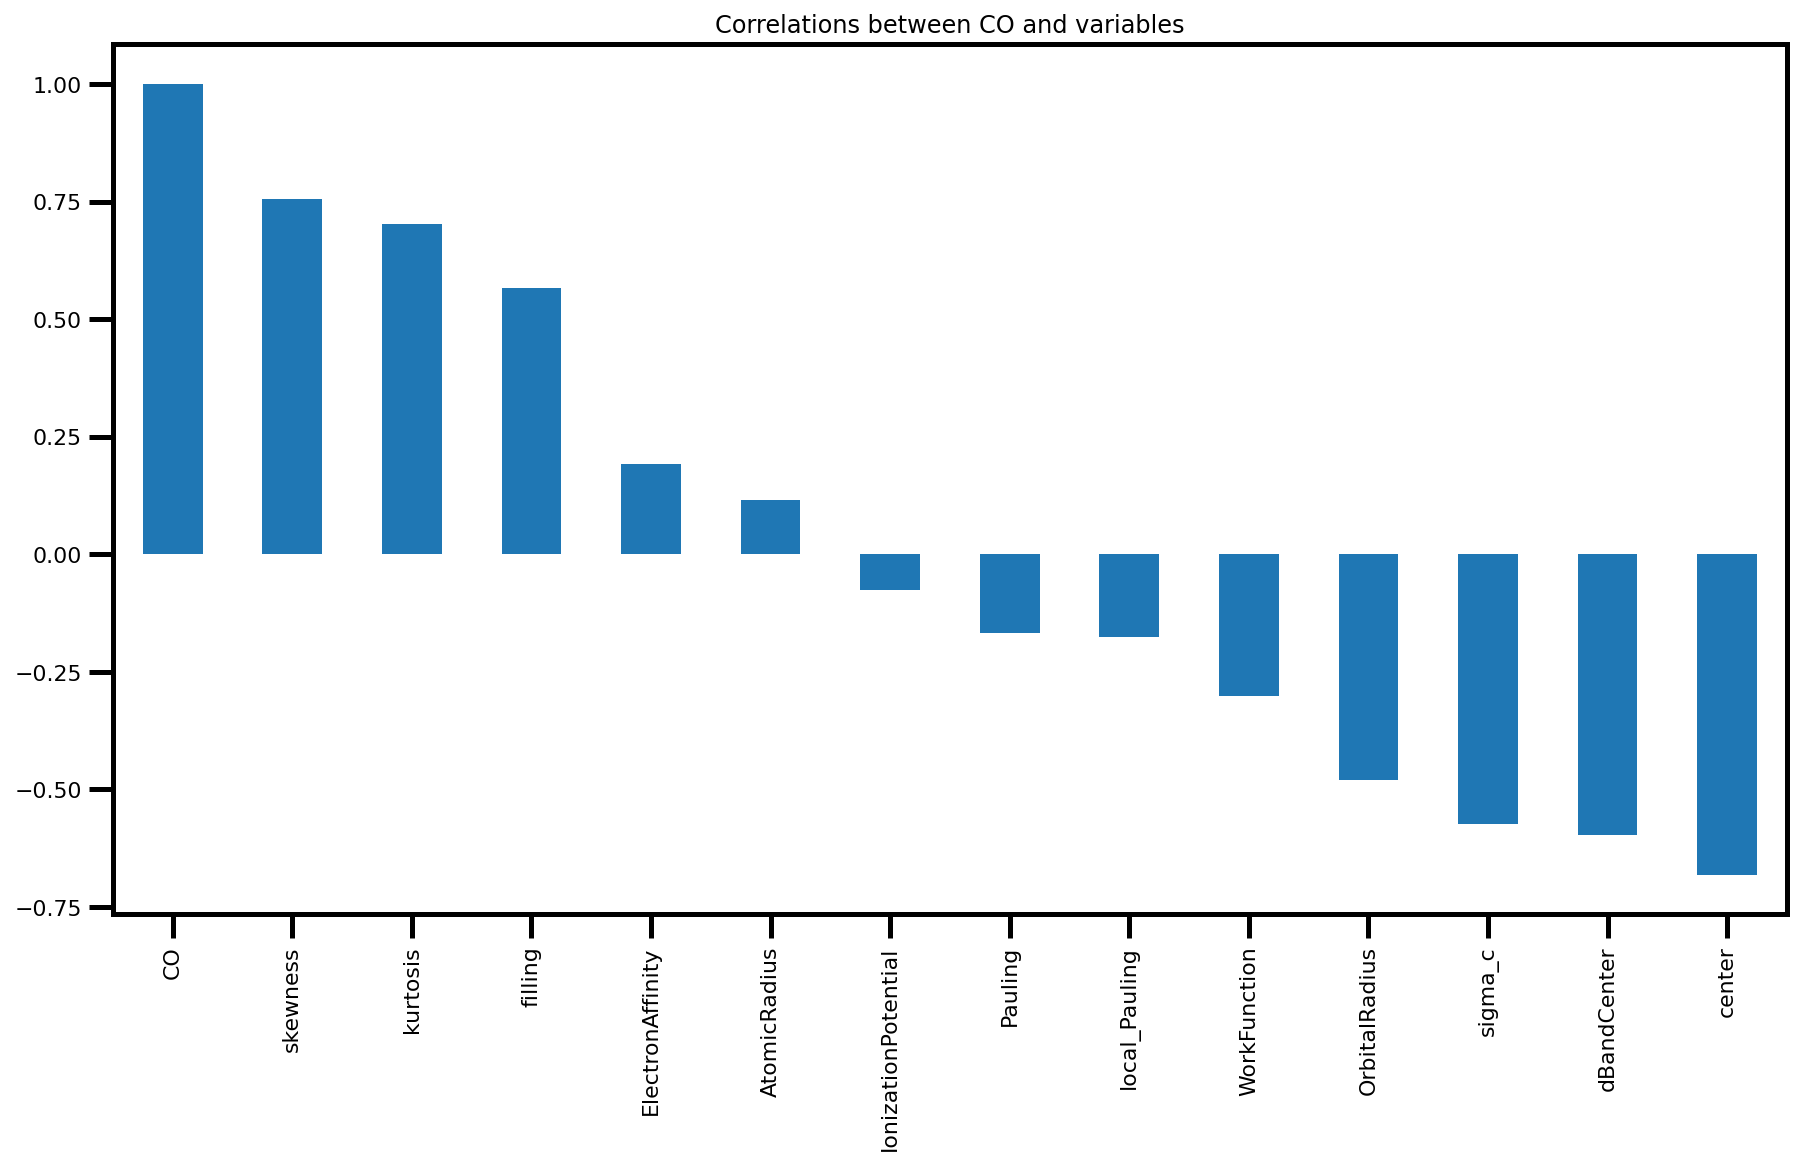

In [35]:
plt.figure(figsize=(15,8))
df.corr()['CO'].sort_values(ascending = False).plot(kind='bar')
plt.title("Correlations between CO and variables")

From the above correlation map, it can be deduced that only following attributes are closely related (as compared to others) to CO:
>| Variables | Correlation |
| :------ | :----------- |
| skewness | 0.76 |
| kurtosis | 0.70 |
| filling | 0.57 |
| AtomicRadius | 0.12 |


Below are the scatter plots of these attributes with respect to Appliances Energy Cosumption:

<AxesSubplot:xlabel='CO', ylabel='AtomicRadius'>

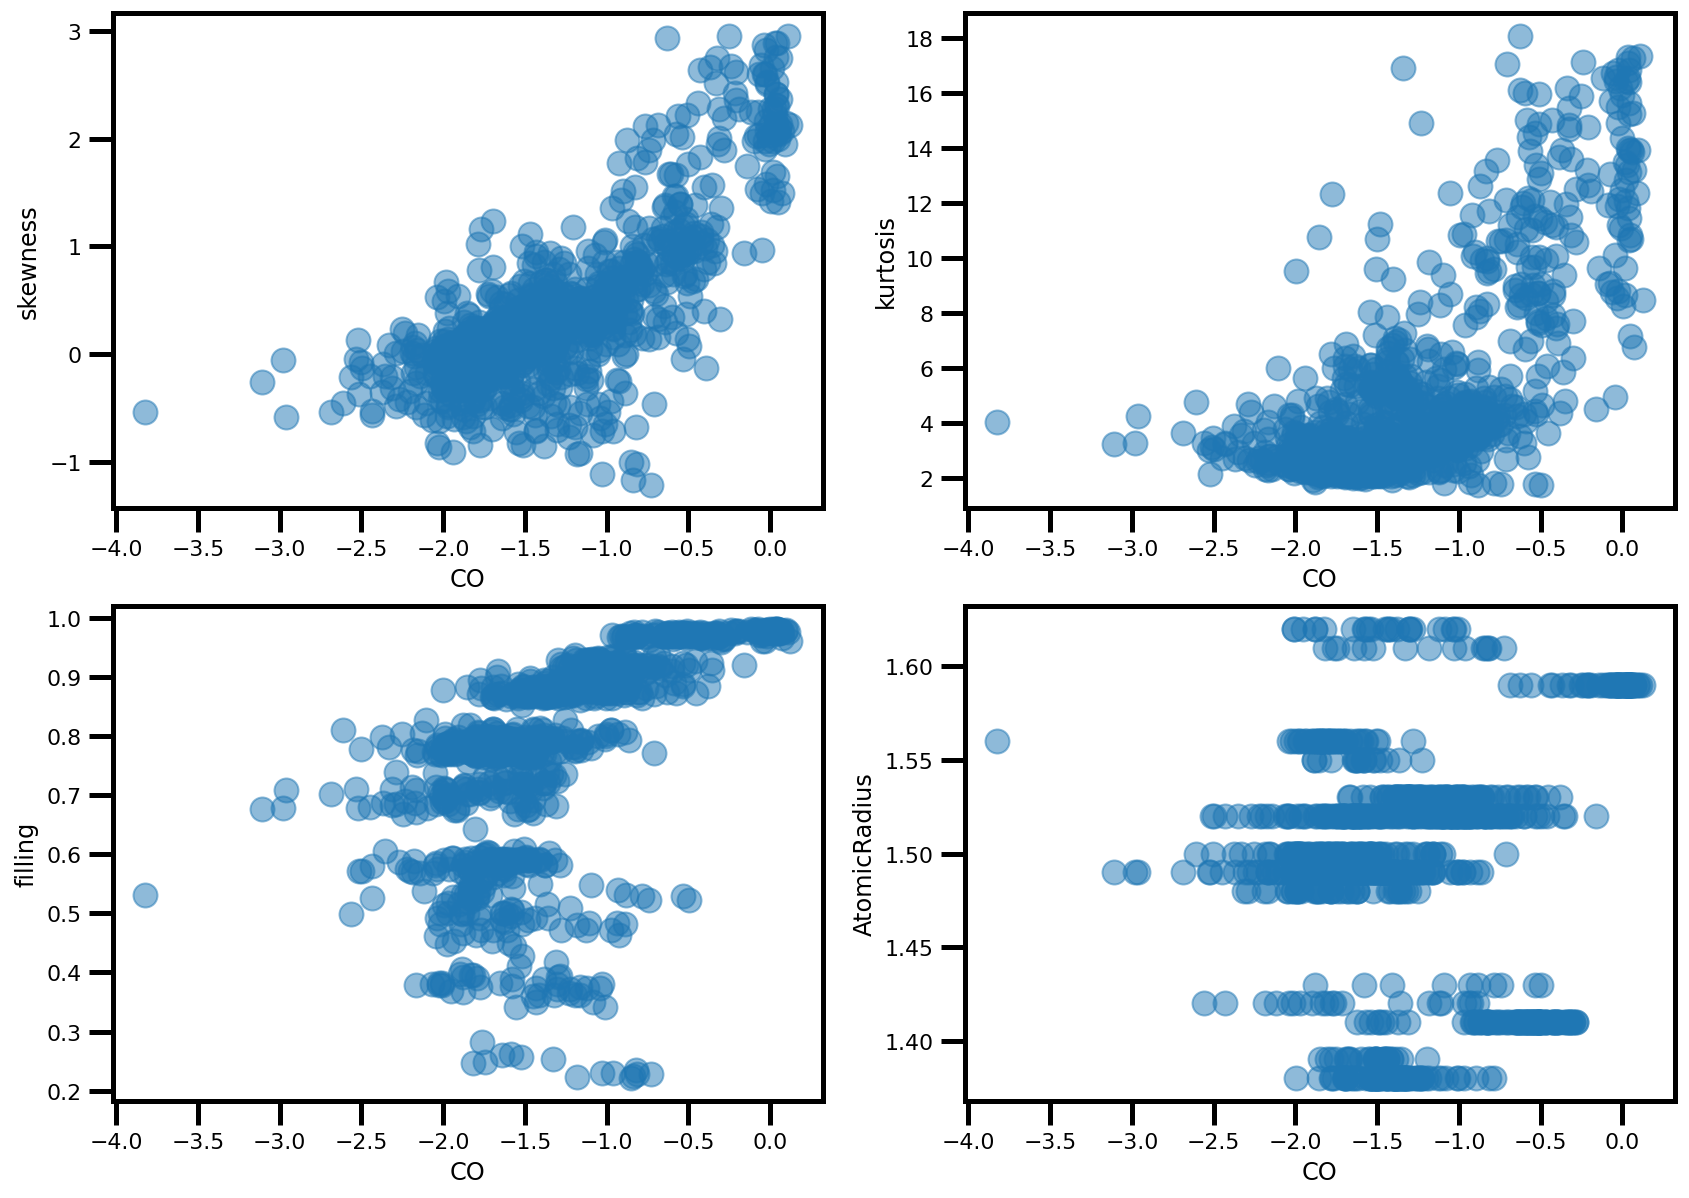

In [41]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(14,10), nrows=2, ncols=2)
sns.regplot(x='CO', y='skewness', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax1)
sns.regplot(x='CO', y='kurtosis', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax2)
sns.regplot(x='CO', y='filling', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax3)
sns.regplot(x='CO', y='AtomicRadius', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax4)

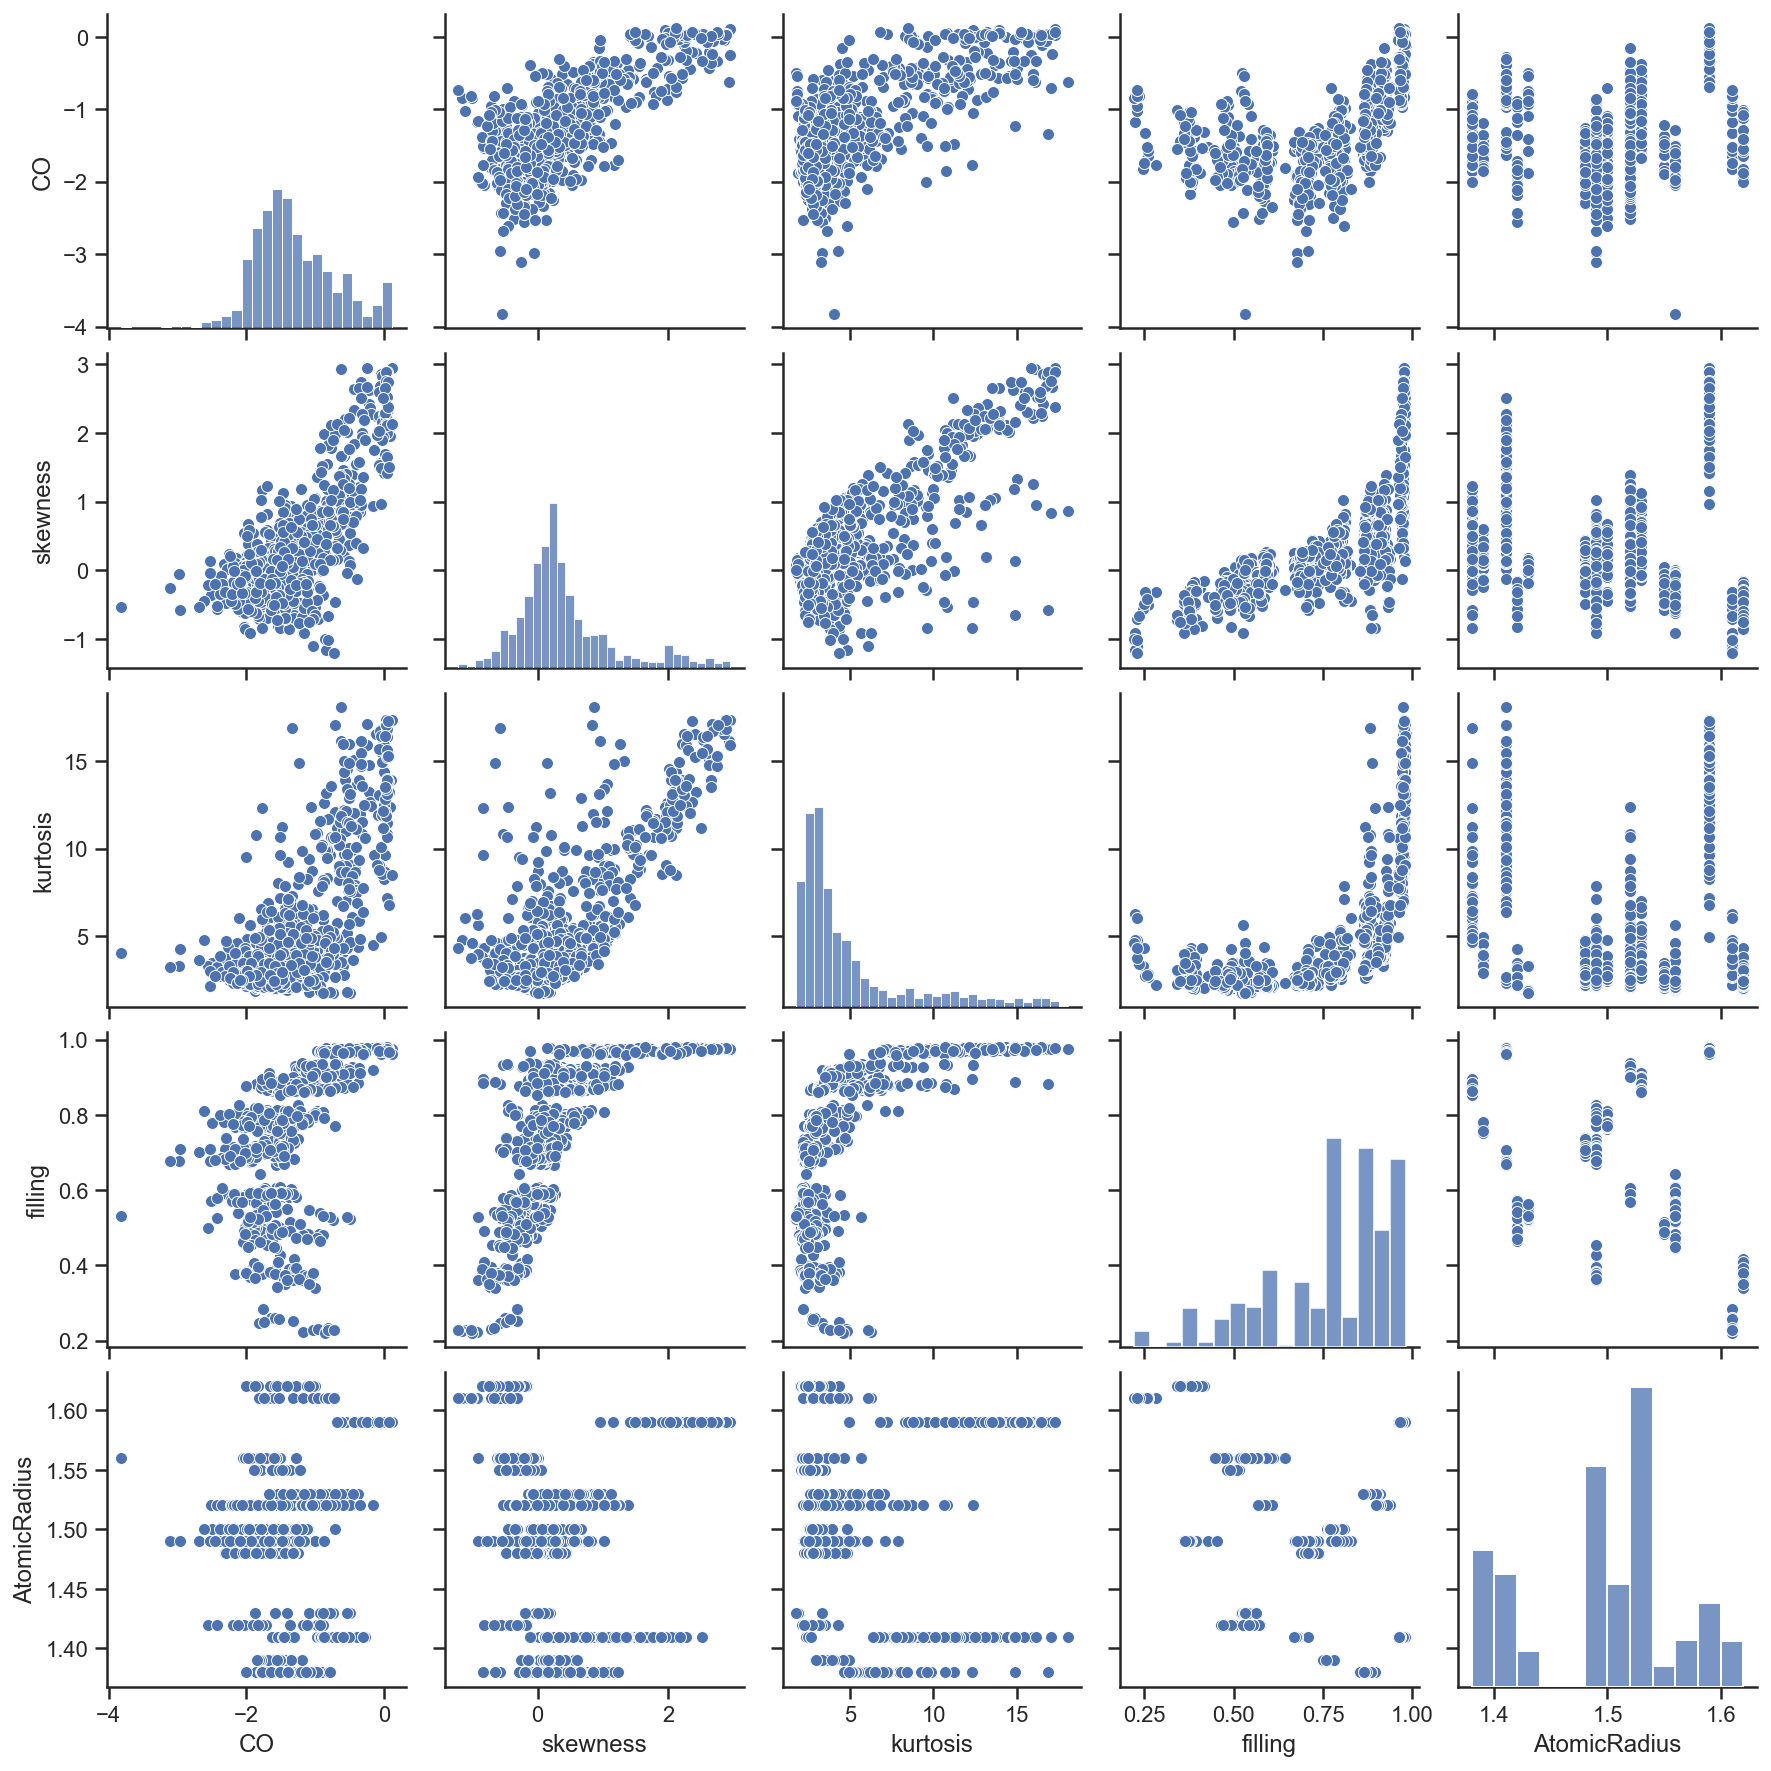

In [43]:
sns.set(style="ticks", color_codes=True);
sns.pairplot(df[['CO', 'skewness', 'kurtosis', 'filling', 'AtomicRadius']]);

Task 1

Maybe for single metal adsorption energy prediction?

Task 2

Maybe for complex metal adsorption energy prediction?